<a href="https://colab.research.google.com/github/Mahmuda-104/Thesis/blob/main/Raw_EEG_BP%2BFeature2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
from scipy.io import loadmat

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/My Drive/Data'

In [4]:
import os
import scipy.io
import numpy as np
from scipy import signal
lowcut = 0.5 
highcut = 50  
fs_original = 500
fs_new = 250

control_data = []
control_path = os.path.join(data_path, 'Control')
for foldername in os.listdir(control_path):
    subfolder_path = os.path.join(control_path, foldername)
    control_data.append(subfolder_path)

Control30 = []
for control_data_path in control_data:
    n_epochs = 40 #len([f for f in os.listdir(control_data_path) if f.endswith('.mat')])
    control_arr = []
    for i in range(1, n_epochs+1):
        epoch_path = f"{control_data_path}/trial{i}.mat"
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]

        b, a = signal.butter(4, [lowcut, highcut], fs=fs_original, btype='band')
        filtered_data = signal.filtfilt(b, a, mat_data1, axis=-1)
        
        # Downsampling
        num_samples_original = filtered_data.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(filtered_data, num_samples_new, axis=-1)
        
        control_arr.append(np.array(downsampled_data))
        
    Control30.append(np.array(control_arr))

Control30 = np.array(Control30)
print( Control30[0].shape)


(40, 60, 1000)


In [5]:
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from scipy.stats import entropy

delta_band = (0.5, 4)
alpha_band = (8, 12)
beta_band = (12, 35)

all_control_power = []
scaler = MinMaxScaler()
epsilon = 1e-10

for i in range(0, len(Control30)):
    control_data = Control30[i]
    control_power = []
    for epoch in control_data:
        epoch_power = []
        for channel_data in epoch:
            freq_spectrum = np.fft.fft(channel_data)
            power_spectrum = np.abs(freq_spectrum) ** 2

            alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
            beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
            delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

            power_spectrum_adjusted = power_spectrum + epsilon
            entropy_values = entropy(power_spectrum_adjusted)

            concatenated_data = np.concatenate((channel_data, [alpha_power, beta_power, delta_power, entropy_values]))
            epoch_power.append(concatenated_data.tolist())
            #print(alpha_power,beta_power,delta_power,entropy_values)

        control_power.append(np.array(epoch_power))

    all_control_power.append(np.array(control_power))
all_control_power=np.array(all_control_power)
print(all_control_power.shape)
print(len(Control30))


(32, 40, 60, 1004)
32


In [6]:
import os
import scipy.io
import numpy as np
from scipy import signal

lowcut = 0.5 
highcut = 50  
fs_original = 500
fs_new = 250  

concussed_data = []
concussed_path = os.path.join(data_path, 'Concussed')
for foldername in os.listdir(concussed_path):
    subfolder_path = os.path.join(concussed_path, foldername)
    concussed_data.append(subfolder_path)

Concussed52 = []
for concussed_data_path in concussed_data:
    n_epochs = 40 #len([f for f in os.listdir(control_data_path) if f.endswith('.mat')])
    concussed_arr = []
    for i in range(1, n_epochs+1):
        epoch_path = f"{concussed_data_path}/trial{i}.mat"
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]
        b, a = signal.butter(4, [lowcut, highcut], fs=fs_original, btype='band')
        filtered_data = signal.filtfilt(b, a, mat_data1, axis=-1)
        
        # Downsampling
        num_samples_original = filtered_data.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(filtered_data, num_samples_new, axis=-1)
        
        concussed_arr.append(np.array(downsampled_data))
        
    Concussed52.append(np.array(concussed_arr))

Concussed52 = np.array(Concussed52)
print( Concussed52[0].shape)


(40, 60, 1000)


In [7]:
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from scipy.stats import entropy

delta_band = (0.5, 4)
alpha_band = (8, 12)
beta_band = (12, 35)

all_concussed_power = []
scaler = MinMaxScaler()
epsilon = 1e-10

for i in range(0, len(Concussed52)):
    concussed_data = Concussed52[i]
    concussed_power = []
    for epoch in concussed_data:
        epoch_power = []
        for channel_data in epoch:
            freq_spectrum = np.fft.fft(channel_data)
            power_spectrum = np.abs(freq_spectrum) ** 2

            alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
            beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
            delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

            power_spectrum_adjusted = power_spectrum + epsilon
            entropy_values = entropy(power_spectrum_adjusted)

            concatenated_data = np.concatenate((channel_data, [alpha_power, beta_power, delta_power, entropy_values]))
            epoch_power.append(concatenated_data.tolist())

        concussed_power.append(np.array(epoch_power))

    all_concussed_power.append(np.array(concussed_power))

all_concussed_power=np.array(all_concussed_power)
print(len(all_concussed_power))
print(len(Concussed52))


52
52


In [8]:
#concussed_power=np.array(concussed_power)
print(all_concussed_power.shape)

(52, 40, 60, 1004)


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
dataset = np.concatenate((all_concussed_power, all_control_power), axis=0)

#(0 for control, 1 for concussed)
labels = np.concatenate((np.zeros(len(all_control_power)), np.ones(len(all_concussed_power))))

In [10]:
train_ratio = 0.8  # 80% for training
val_ratio = 0.1   # 10% for validation
test_ratio = 0.1  # 10% for testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=test_ratio, stratify=labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), stratify=y_train, random_state=42)

Epoch 1/100
3/3 [==============================] - 17s 883ms/step - loss: 549553.9375 - accuracy: 0.5152 - val_loss: 195227.7500 - val_accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 1s 224ms/step - loss: 297936.2500 - accuracy: 0.6212 - val_loss: 90521.8906 - val_accuracy: 0.6667
Epoch 3/100
3/3 [==============================] - 1s 206ms/step - loss: 540359.8125 - accuracy: 0.5606 - val_loss: 30976.6777 - val_accuracy: 0.4444
Epoch 4/100
3/3 [==============================] - 1s 301ms/step - loss: 367326.5312 - accuracy: 0.3636 - val_loss: 57622.1094 - val_accuracy: 0.5556
Epoch 5/100
3/3 [==============================] - 1s 275ms/step - loss: 346899.6562 - accuracy: 0.5455 - val_loss: 82213.2031 - val_accuracy: 0.5556
Epoch 6/100
3/3 [==============================] - 1s 365ms/step - loss: 283998.5312 - accuracy: 0.4848 - val_loss: 88877.2266 - val_accuracy: 0.5556
Epoch 7/100
3/3 [==============================] - 1s 330ms/step - loss: 387363.2500 - accuracy: 0

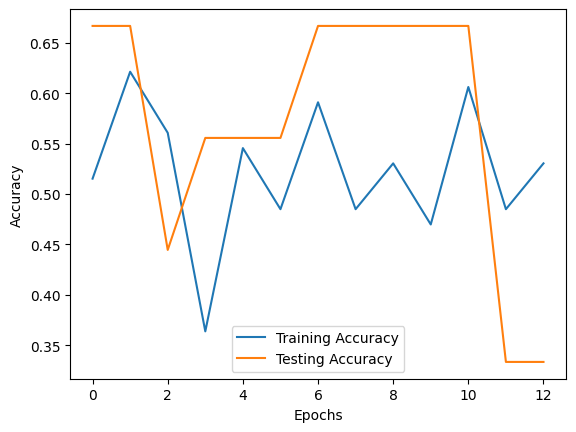

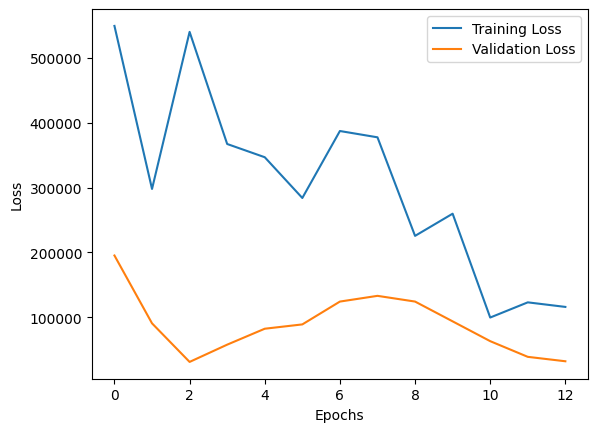

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Normalize the input data
# X_train = X_train / 255.0
# X_val = X_val / 255.0
# X_test = X_test / 255.0
input_shape = X_train.shape[1:]
# Build the CNN model
model = tf.keras.Sequential()
model.add(layers.Conv2D(16, kernel_size=(6, 6), strides=1, activation='relu', padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

learning_rate = 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

# Generate training and testing accuracy
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

# Generate learning curve
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and testing accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot learning curve
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100
3/3 [==============================] - 4s 523ms/step - loss: 177137.7344 - accuracy: 0.5758 - val_loss: 14586.9619 - val_accuracy: 0.7778
Epoch 2/100
3/3 [==============================] - 1s 294ms/step - loss: 197017.9688 - accuracy: 0.5455 - val_loss: 14357.6914 - val_accuracy: 0.7778
Epoch 3/100
3/3 [==============================] - 1s 273ms/step - loss: 344539.9375 - accuracy: 0.5303 - val_loss: 13081.2061 - val_accuracy: 0.7778
Epoch 4/100
3/3 [==============================] - 1s 264ms/step - loss: 203430.7812 - accuracy: 0.5303 - val_loss: 12720.2715 - val_accuracy: 0.6667
Epoch 5/100
3/3 [==============================] - 1s 230ms/step - loss: 229467.2031 - accuracy: 0.4394 - val_loss: 12653.7158 - val_accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 1s 221ms/step - loss: 166924.6250 - accuracy: 0.5303 - val_loss: 12798.6826 - val_accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 1s 214ms/step - loss: 372023.7188 - accuracy: 0.5

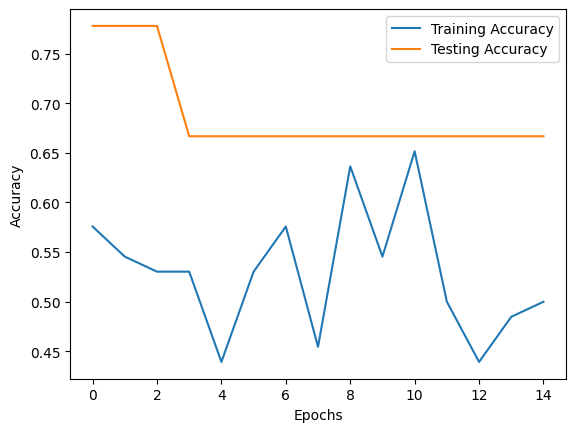

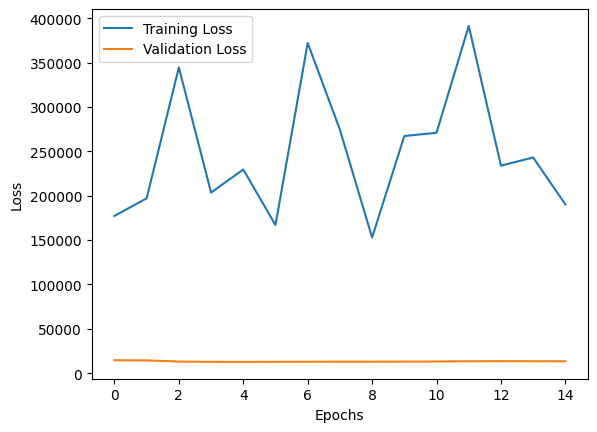

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=test_ratio, stratify=labels, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), stratify=y_train, random_state=42)

# Normalize the input data (if required)
# X_train = X_train / 255.0
# X_val = X_val / 255.0
# X_test = X_test / 255.0

# Reshape the input data based on the expected input shape of the model
input_shape = X_train.shape[1:]  # Assuming the first dimension is the number of samples
X_train = X_train.reshape((-1,) + input_shape)
X_val = X_val.reshape((-1,) + input_shape)
X_test = X_test.reshape((-1,) + input_shape)

# Build the CNN model
model = tf.keras.Sequential()
model.add(layers.Conv2D(16, kernel_size=(6, 6),strides=1, activation='relu',padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, kernel_size=(3, 3),strides=1, activation='relu',padding='same'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with the desired loss function and optimizer
learning_rate = 0.00001  # Specify your desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

# Generate learning curve
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and testing accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(testing_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot learning curve
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
